In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import preprocessing


In [2]:
csv = 'Crash_Data.csv'
my_df = pd.read_csv(csv)
my_df.head()


,Crash ID,Date,Day of Week,Time,Lane Count,Crash Type,Functional Class,Speed Limit,Environmental Conditions,Light Conditions,...,Total Vehicles Involved,Curve Related,Alcohol Involved,Distracted Driving Involved,Drugged Driver Involved,Older Driver Involved,Temp Traffic Control Zone,Traffic Controls Present,Vehicle Type,Severity
0,9969918,4,1,2,3,3,2,4,1,4,...,2,2,2,2,2,1,1,1,1,3
1,9741036,4,1,1,3,1,2,4,1,4,...,2,1,2,1,2,2,1,1,1,3
2,9965952,4,1,1,3,1,2,4,1,3,...,2,2,2,1,2,3,1,1,1,3
3,9705367,4,1,1,2,3,2,1,2,2,...,2,2,2,2,2,2,1,1,3,3
4,9741034,4,2,1,3,3,2,4,2,4,...,2,2,2,2,2,2,1,1,1,3


In [7]:
my_df['Severity'].isnull().sum()
len(my_df['Severity'])

8232

In [8]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(index=my_df["Severity"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
Severity,
1,13
2,254
3,7965


In [29]:
X = my_df.iloc[:,1:-1].values
y = my_df.iloc[:,20].values

In [35]:
from sklearn.model_selection import train_test_split
def split_x_y():  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    return X_train, X_test, y_train, y_test

In [36]:
from sklearn.preprocessing import StandardScaler
def scaling_data(X_train, X_test):
    scaler_train = StandardScaler()
    scaler_train.fit(X_train)
    X_train = scaler_train.transform(X_train)
    X_test = scaler_train.transform(X_test)
    return X_train, X_test

In [37]:
#This is the solution for B..one data per class for trainig.........
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
accuracy = dict()
for i in range(1,10,2):
    accuracy[i]=[0]
for k in range(1,10,2):
    temp = []
    for i in range(1,21):
        X_train, X_test, y_train, y_test = split_x_y()
        X_train, X_test = scaling_data(X_train, X_test)
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(X_train,y_train)
        y_pred_one = classifier.predict(X_test)
        res = metrics.accuracy_score(y_test, y_pred_one)
        temp.append(res)
    accuracy[k]=temp
    # print("Accuracy for the value of k = 1 is  ",metrics.accuracy_score(y_test, y_pred_one))

In [41]:
for i in range(1,10,2):
    print((accuracy[i]))

[0.9332119004250152, 0.9465695203400122, 0.9411050394656952, 0.9374620522161505, 0.9374620522161505, 0.9465695203400122, 0.9368548876745598, 0.9423193685488768, 0.9447480267152398, 0.928354584092289, 0.9411050394656952, 0.936247723132969, 0.944140862173649, 0.9271402550091075, 0.9392835458409229, 0.9429265330904675, 0.9344262295081968, 0.9514268366727383, 0.941712204007286, 0.9392835458409229]
[0.9672131147540983, 0.9617486338797814, 0.9568913175470553, 0.9647844565877353, 0.9672131147540983, 0.9599271402550091, 0.9678202792956891, 0.9623557984213722, 0.9726775956284153, 0.9672131147540983, 0.9678202792956891, 0.9641772920461446, 0.9666059502125076, 0.9684274438372799, 0.9690346083788707, 0.9641772920461446, 0.9659987856709168, 0.9659987856709168, 0.9684274438372799, 0.9641772920461446]
[0.9720704310868246, 0.9623557984213722, 0.9666059502125076, 0.9684274438372799, 0.9684274438372799, 0.9617486338797814, 0.9659987856709168, 0.9666059502125076, 0.9684274438372799, 0.9702489374620522, 0

# **Solution of B:From the accuracy dictionary we can say that the accuracy for k=1 and n=1 then with the test data is = .43125(though it changes with the undefined random state during split the data)**

In [48]:
# import the math module  
import math
mean_accuracy = {}
for i in range(1,10,2):
    temp=accuracy[i]
    sum = 0 
    for j in temp:
      sum+=j
    mean_accuracy[i]=sum/20
for key,value in mean_accuracy.items():
  print("The mean accuracy when k = {} is ".format(key),value)
#Standard deviation.........
standard_dev = {}
for i in range(1,10,2):
  sum = 0
  list_ac = accuracy[i]
  for j in range(0,20):
    mean = mean_accuracy[i]
#     print(list_ac[j])
    temp = (mean-list_ac[j])
    temp*=temp
    sum+=temp
  dev = sum/20
  dev = math.sqrt(dev)
  standard_dev[i]=dev
for key,value in standard_dev.items():
  print("The standard deviation with respect to the num or data k = {} is ".format(key),value)

The mean accuracy when k = 1 is  0.9396174863387978
The mean accuracy when k = 3 is  0.9656344869459623
The mean accuracy when k = 5 is  0.9669398907103824
The mean accuracy when k = 7 is  0.9678202792956894
The mean accuracy when k = 9 is  0.9673952641165757
The standard deviation with respect to the num or data k = 1 is  0.005869353194506199
The standard deviation with respect to the num or data k = 3 is  0.0034421463953997126
The standard deviation with respect to the num or data k = 5 is  0.0036301890148106608
The standard deviation with respect to the num or data k = 7 is  0.003555932110345192
The standard deviation with respect to the num or data k = 9 is  0.0037482269178022234


#**Solution of D: We can see the accuracy of 20 iteration along with different num of data...accuracy dictionary has these accuracy information. And the mean accuracy of these different n is: provided in mean_accuracy dictionary**

No handles with labels found to put in legend.


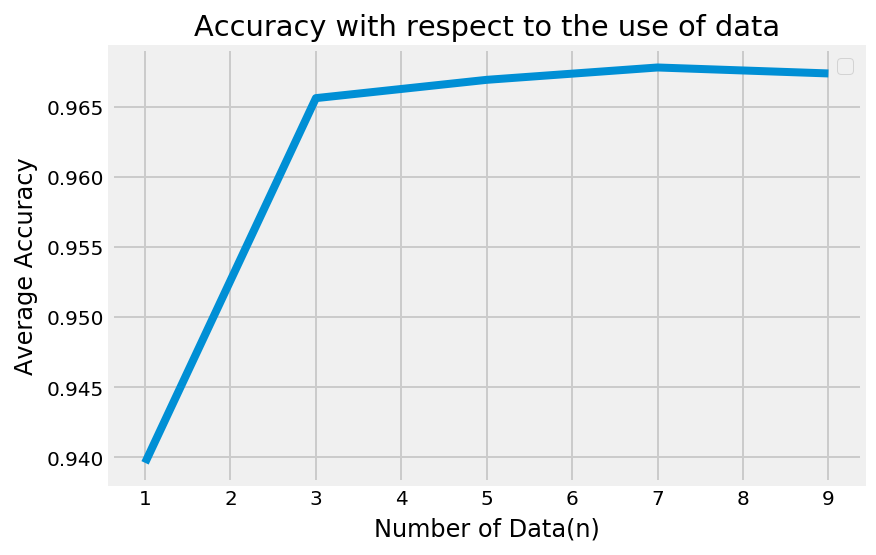

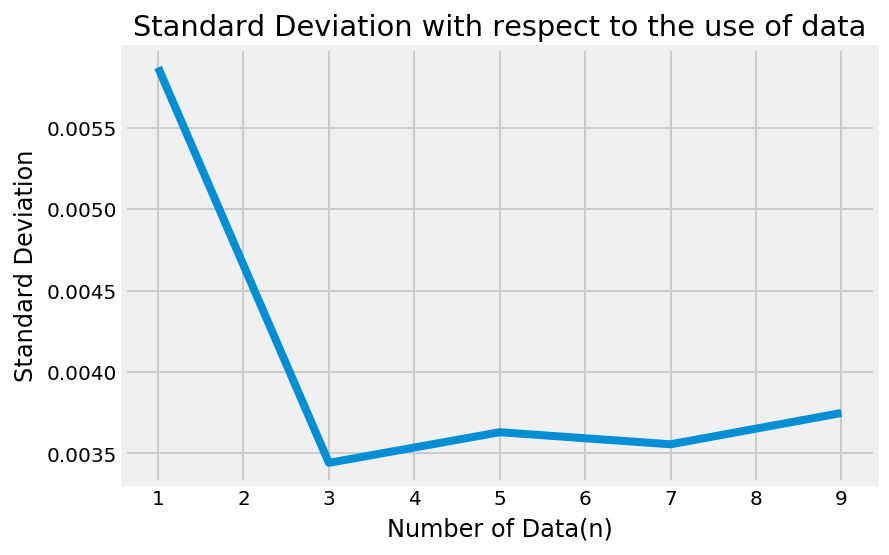

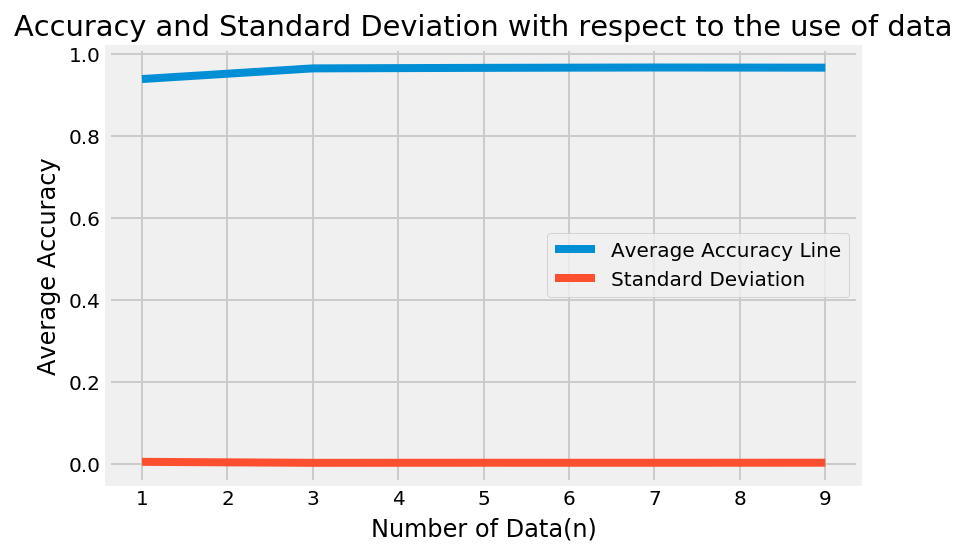

In [53]:
average_accuracy = []
stadard_deviation = []
for i in range(1,10,2):
    average_accuracy.append(mean_accuracy[i])
    stadard_deviation.append(standard_dev[i])

from sklearn import metrics
plt.plot(range(1,10,2), average_accuracy)
plt.xlabel('Number of Data(n)')
plt.ylabel('Average Accuracy')
plt.title('Accuracy with respect to the use of data')
plt.legend() 
plt.show()


plt.plot(range(1,10,2), stadard_deviation)
plt.xlabel('Number of Data(n)')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation with respect to the use of data')
plt.show()

plt.plot(range(1,10,2), average_accuracy, label = "Average Accuracy Line")
plt.plot(range(1,10,2), stadard_deviation ,label = "Standard Deviation")
plt.xlabel('Number of Data(n)')
plt.ylabel('Average Accuracy')
plt.title('Accuracy and Standard Deviation with respect to the use of data')
plt.legend() 
plt.show()
